In [31]:
import os

first_print_path = r"C:\Users\KIIT\alemeno\First Print-20250325T162035Z-001"
second_print_path = r"C:\Users\KIIT\alemeno\Second Print-20250325T163643Z-001"

def list_files(folder):
    for root, dirs, files in os.walk(folder):
        print(f"📂 Folder: {root} - {len(files)} images")

print("First Print Structure:")
list_files(first_print_path)

print("\nSecond Print Structure:")
list_files(second_print_path)


First Print Structure:
📂 Folder: C:\Users\KIIT\alemeno\First Print-20250325T162035Z-001 - 0 images
📂 Folder: C:\Users\KIIT\alemeno\First Print-20250325T162035Z-001\First Print - 100 images

Second Print Structure:
📂 Folder: C:\Users\KIIT\alemeno\Second Print-20250325T163643Z-001 - 0 images
📂 Folder: C:\Users\KIIT\alemeno\Second Print-20250325T163643Z-001\Second Print - 100 images


In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## EDA

Total images: 200
First Print images: 100, Second Print images: 100


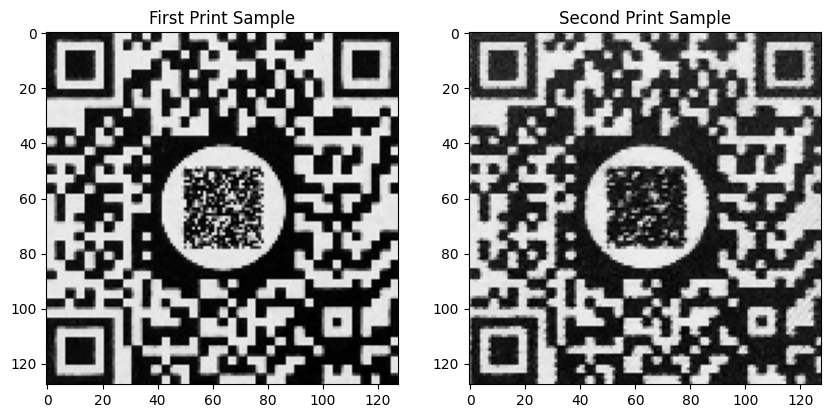

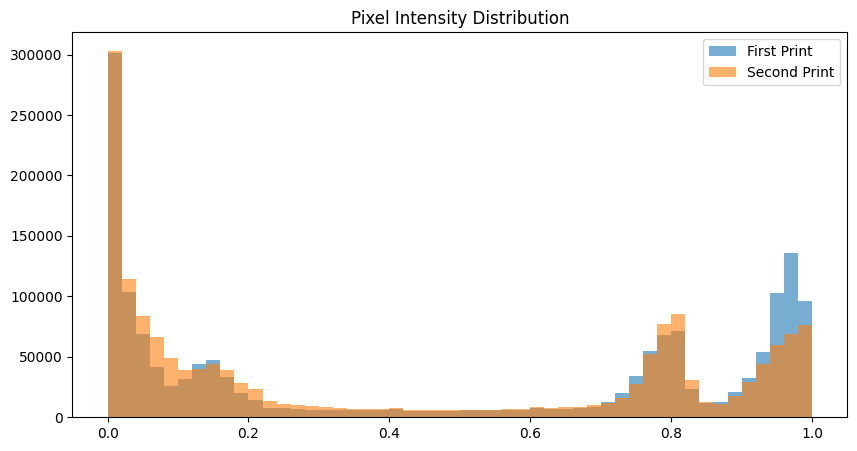

In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  Data Exploration and Analysis
def load_and_preprocess_images(folder_path, label, img_size=(128, 128)):
    images = os.listdir(folder_path)
    X, y = [], []
    
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, img_size)
        X.append(img / 255.0)  # Normalize
        y.append(label)
    
    return np.array(X).reshape(-1, img_size[0], img_size[1], 1), np.array(y, dtype=np.uint8)

# Define Dataset Paths
first_print_path = r"C:\Users\KIIT\alemeno\First Print-20250325T162035Z-001\First Print"
second_print_path = r"C:\Users\KIIT\alemeno\Second Print-20250325T163643Z-001\Second Print"

# Load Dataset
X_first, y_first = load_and_preprocess_images(first_print_path, 0)
X_second, y_second = load_and_preprocess_images(second_print_path, 1)

# Combine Data
X = np.vstack((X_first, X_second))
y = np.concatenate((y_first, y_second))

# Fix Label Shape
y = y.flatten()

# Report Dataset Statistics
print(f"Total images: {len(X)}")
print(f"First Print images: {len(X_first)}, Second Print images: {len(X_second)}")

# Visualize Sample Images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X_first[0].reshape(128, 128), cmap='gray')
axes[0].set_title("First Print Sample")
axes[1].imshow(X_second[0].reshape(128, 128), cmap='gray')
axes[1].set_title("Second Print Sample")
plt.show()

# Feature Engineering - Histogram Analysis
plt.figure(figsize=(10, 5))
plt.hist(X_first.flatten(), bins=50, alpha=0.6, label="First Print")
plt.hist(X_second.flatten(), bins=50, alpha=0.6, label="Second Print")
plt.legend()
plt.title("Pixel Intensity Distribution")
plt.show()


## Feature Engineering

Total images: 200
First Print images: 100, Second Print images: 100


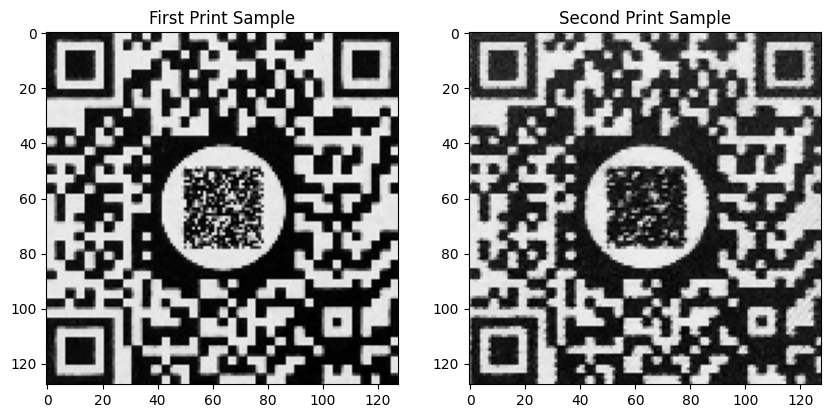

Performing Feature Engineering...


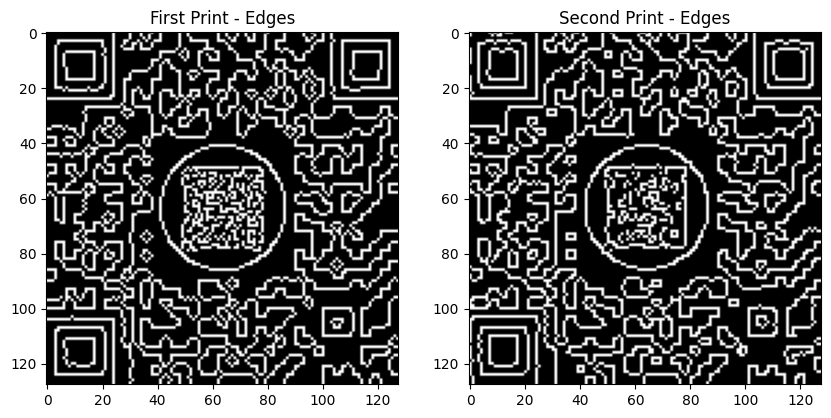

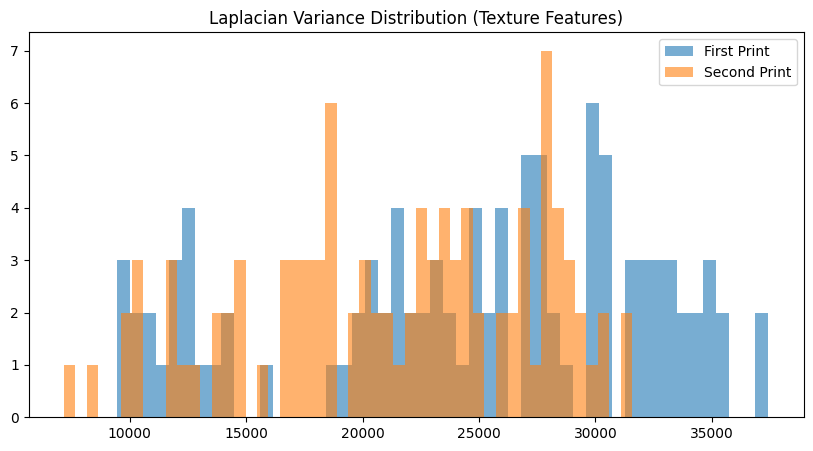

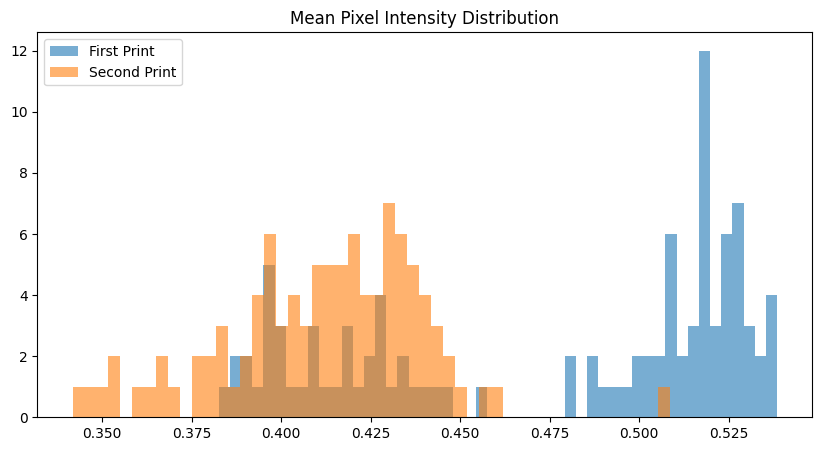

Feature Engineering Completed.


In [38]:


# 1️⃣ Data Exploration and Analysis
def load_and_preprocess_images(folder_path, label, img_size=(128, 128)):
    images = os.listdir(folder_path)
    X, y = [], []
    
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, img_size)
        X.append(img / 255.0)  # Normalize
        y.append(label)
    
    return np.array(X).reshape(-1, img_size[0], img_size[1], 1), np.array(y, dtype=np.uint8)

# Define Dataset Paths
first_print_path = r"C:\Users\KIIT\alemeno\First Print-20250325T162035Z-001\First Print"
second_print_path = r"C:\Users\KIIT\alemeno\Second Print-20250325T163643Z-001\Second Print"

# Load Dataset
X_first, y_first = load_and_preprocess_images(first_print_path, 0)
X_second, y_second = load_and_preprocess_images(second_print_path, 1)

# Combine Data
X = np.vstack((X_first, X_second))
y = np.concatenate((y_first, y_second))

# Fix Label Shape
y = y.flatten()

# Report Dataset Statistics
print(f"Total images: {len(X)}")
print(f"First Print images: {len(X_first)}, Second Print images: {len(X_second)}")

# Visualize Sample Images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X_first[0].reshape(128, 128), cmap='gray')
axes[0].set_title("First Print Sample")
axes[1].imshow(X_second[0].reshape(128, 128), cmap='gray')
axes[1].set_title("Second Print Sample")
plt.show()

# Feature Engineering
print("Performing Feature Engineering...")

# 1. Edge Detection using Canny
edges_first = [cv2.Canny((img * 255).astype(np.uint8), 100, 200) for img in X_first]
edges_second = [cv2.Canny((img * 255).astype(np.uint8), 100, 200) for img in X_second]

# Display Edge Detection Results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(edges_first[0], cmap='gray')
axes[0].set_title("First Print - Edges")
axes[1].imshow(edges_second[0], cmap='gray')
axes[1].set_title("Second Print - Edges")
plt.show()

# 2. Texture Features using Laplacian Variance
laplacian_var_first = [cv2.Laplacian((img * 255).astype(np.uint8), cv2.CV_64F).var() for img in X_first]
laplacian_var_second = [cv2.Laplacian((img * 255).astype(np.uint8), cv2.CV_64F).var() for img in X_second]

# Plot Laplacian Variance Distribution
plt.figure(figsize=(10, 5))
plt.hist(laplacian_var_first, bins=50, alpha=0.6, label="First Print")
plt.hist(laplacian_var_second, bins=50, alpha=0.6, label="Second Print")
plt.legend()
plt.title("Laplacian Variance Distribution (Texture Features)")
plt.show()

# 3. Mean Pixel Intensity
mean_intensity_first = [np.mean(img) for img in X_first]
mean_intensity_second = [np.mean(img) for img in X_second]

plt.figure(figsize=(10, 5))
plt.hist(mean_intensity_first, bins=50, alpha=0.6, label="First Print")
plt.hist(mean_intensity_second, bins=50, alpha=0.6, label="Second Print")
plt.legend()
plt.title("Mean Pixel Intensity Distribution")
plt.show()

print("Feature Engineering Completed.")


## Model devlopment and tunning

In [45]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# 1️⃣ Data Exploration and Analysis
def load_and_preprocess_images(folder_path, label, img_size=(128, 128)):
    images = os.listdir(folder_path)
    X, y = [], []
    
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, img_size)
        X.append(img / 255.0)  # Normalize
        y.append(label)
    
    return np.array(X).reshape(-1, img_size[0], img_size[1], 1), np.array(y, dtype=np.uint8)

# Define Dataset Paths
first_print_path = r"C:\Users\KIIT\alemeno\First Print-20250325T162035Z-001\First Print"
second_print_path = r"C:\Users\KIIT\alemeno\Second Print-20250325T163643Z-001\Second Print"

# Load Dataset
X_first, y_first = load_and_preprocess_images(first_print_path, 0)
X_second, y_second = load_and_preprocess_images(second_print_path, 1)

# Combine Data
X = np.vstack((X_first, X_second))
y = np.concatenate((y_first, y_second))

# Fix Label Shape
y = y.flatten()

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Improved Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.4,
    height_shift_range=0.4,
    zoom_range=0.5,
    shear_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.3, 1.7]
)

# 3️⃣ Final Optimized CNN Model
def build_cnn_model():
    inputs = Input(shape=(128, 128, 1))
    
    x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2,2, padding='same')(x)
    
    x = Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2,2, padding='same')(x)
    
    x = Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2,2, padding='same')(x)
    
    x = Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2,2, padding='same')(x)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 4️⃣ Training and Evaluation
# Callbacks for Better Training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

# Train CNN for 75 Epochs
model = build_cnn_model()
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    callbacks=[early_stop, reduce_lr])

# Evaluate CNN
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/20


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.5276 - loss: 3.0100 - val_accuracy: 0.5250 - val_loss: 2.9870 - learning_rate: 1.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5346 - loss: 3.0129 - val_accuracy: 0.5250 - val_loss: 2.9790 - learning_rate: 1.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4790 - loss: 3.1980 - val_accuracy: 0.5250 - val_loss: 2.9723 - learning_rate: 1.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5676 - loss: 2.9593 - val_accuracy: 0.5250 - val_loss: 2.9660 - learning_rate: 1.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4973 - loss: 3.0507 - val_accuracy: 0.5250 - val_loss: 2.9599 - learning_rate: 1.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5338 - loss: 2.9600 - val_accuracy: 0.5250 - val_loss: 2.9540 - learning_rate: 1.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5049 - loss: 2.9890 - val_accuracy: 0

In [46]:
# 5️⃣ Evaluation Metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=["First Print", "Second Print"])
print("Classification Report:")
print(class_report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 452ms/step
Confusion Matrix:
[[21  0]
 [19  0]]
Classification Report:
              precision    recall  f1-score   support

 First Print       0.53      1.00      0.69        21
Second Print       0.00      0.00      0.00        19

    accuracy                           0.53        40
   macro avg       0.26      0.50      0.34        40
weighted avg       0.28      0.53      0.36        40



C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

## Model deployment

In [47]:
print("Deployment Considerations:")
print("- Deploy model using Flask/FastAPI for real-time authentication.")
print("- Convert model to TensorFlow Lite (TFLite) for edge device compatibility.")
print("- Use ONNX format for cross-platform deployment.")
print("- Optimize inference with TensorRT for better performance on GPUs.")
print("- Secure API with authentication & rate limiting to prevent abuse.")

Deployment Considerations:
- Deploy model using Flask/FastAPI for real-time authentication.
- Convert model to TensorFlow Lite (TFLite) for edge device compatibility.
- Use ONNX format for cross-platform deployment.
- Optimize inference with TensorRT for better performance on GPUs.
- Secure API with authentication & rate limiting to prevent abuse.
